In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Echo_Alexa_speaker_series_reviews.xlsx')
df.head()

,rating,date,variation,verified_reviews,feedback,NPS
0,5,31/07/2018,Charcoal Fabric,Yêu Echo của tôi!,1,10
1,5,31/07/2018,Charcoal Fabric,Đã yêu nó!,1,7
2,4,31/07/2018,Walnut Finish,"Đôi khi khi chơi trò chơi, bạn có thể trả lời ...",1,7
3,5,31/07/2018,Charcoal Fabric,Tôi đã có rất nhiều niềm vui với điều này. Đứa...,1,10
4,5,31/07/2018,Charcoal Fabric,Âm nhạc,1,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070 entries, 0 to 3069
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3070 non-null   int64 
 1   date              3070 non-null   object
 2   variation         3070 non-null   object
 3   verified_reviews  3070 non-null   object
 4   feedback          3070 non-null   int64 
 5   NPS               3070 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 144.0+ KB


In [ ]:
df.describe()

,rating,feedback,NPS
count,3070.000000,3070.000000,3070.000000
mean,4.483062,0.922476,7.811401
std,1.044874,0.267465,2.144488
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,7.000000
50%,5.000000,1.000000,8.000000
75%,5.000000,1.000000,9.000000
max,5.000000,1.000000,10.000000


In [ ]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
NPS                 0
dtype: int64

In [ ]:
df.shape

(3070, 6)

In [ ]:
df.duplicated().sum()

177

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2893, 6)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the custom Vietnamese stopwords from an Excel file
stopwords_df = pd.read_excel('/content/vietnamese_stopword.xlsx', sheet_name='Sheet1')

In [ ]:
stopwords_df.head()

,stopwords_vie
0,a
1,lô
2,a ha
3,ai
4,ai ai


In [ ]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 43.2 MB/s eta 0:00:00


In [ ]:
from underthesea import word_tokenize
import re

In [ ]:
custom_stopwords_list = stopwords_df['stopwords_vie'].tolist()
CUSTOM_STOPWORDS = set(custom_stopwords_list)

In [ ]:
#A Function that convert lowcase text, remove punctuation and filter out stopword

def clean_text(text, CUSTOM_STOPWORDS):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in CUSTOM_STOPWORDS]
    # Join the filtered tokens back into a single string
    return ' '.join(filtered_tokens)


# Apply the clean_text function to the 'verified_reviews' column
df['filtered_reviews'] = df['verified_reviews'].apply(lambda x: clean_text(x, CUSTOM_STOPWORDS))

df.head()

,rating,date,variation,verified_reviews,feedback,NPS,filtered_reviews
0,5,31/07/2018,Charcoal Fabric,Yêu Echo của tôi!,1,10,yêu echo của tôi
1,5,31/07/2018,Charcoal Fabric,Đã yêu nó!,1,7,đã yêu nó
2,4,31/07/2018,Walnut Finish,"Đôi khi khi chơi trò chơi, bạn có thể trả lời ...",1,7,đôi khi khi trò chơi trả lời đúng một câu hỏi ...
3,5,31/07/2018,Charcoal Fabric,Tôi đã có rất nhiều niềm vui với điều này. Đứa...,1,10,tôi đã rất nhiều niềm vui với điều này đứa 4 t...
4,5,31/07/2018,Charcoal Fabric,Âm nhạc,1,9,âm nhạc


In [ ]:
#Getting the record where 'filtered_reviews' is null

df[df['filtered_reviews'].isna()]


,rating,date,variation,verified_reviews,feedback,NPS,filtered_reviews


In [ ]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

df['length'] = df['filtered_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,NPS,filtered_reviews,length
0,5,31/07/2018,Charcoal Fabric,Yêu Echo của tôi!,1,10,yêu echo của tôi,16
1,5,31/07/2018,Charcoal Fabric,Đã yêu nó!,1,7,đã yêu nó,9
2,4,31/07/2018,Walnut Finish,"Đôi khi khi chơi trò chơi, bạn có thể trả lời ...",1,7,đôi khi khi trò chơi trả lời đúng một câu hỏi ...,140
3,5,31/07/2018,Charcoal Fabric,Tôi đã có rất nhiều niềm vui với điều này. Đứa...,1,10,tôi đã rất nhiều niềm vui với điều này đứa 4 t...,146
4,5,31/07/2018,Charcoal Fabric,Âm nhạc,1,9,âm nhạc,7


In [ ]:
#Drop the verified_reviews and just use the filtered_reviews

df.drop('verified_reviews', axis=1, inplace=True)
df.head()

,rating,date,variation,feedback,NPS,filtered_reviews,length
0,5,31/07/2018,Charcoal Fabric,1,10,yêu echo của tôi,16
1,5,31/07/2018,Charcoal Fabric,1,7,đã yêu nó,9
2,4,31/07/2018,Walnut Finish,1,7,đôi khi khi trò chơi trả lời đúng một câu hỏi ...,140
3,5,31/07/2018,Charcoal Fabric,1,10,tôi đã rất nhiều niềm vui với điều này đứa 4 t...,146
4,5,31/07/2018,Charcoal Fabric,1,9,âm nhạc,7


In [ ]:
df.dtypes

rating               int64
date                object
variation           object
feedback             int64
NPS                  int64
filtered_reviews    object
length               int64
dtype: object

*   **rating, feedback and length are integer values**
*   **date, variation and filtered_reviews are string values**


In [ ]:
from datetime import datetime

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df.dtypes

rating                       int64
date                datetime64[ns]
variation                   object
feedback                     int64
NPS                          int64
filtered_reviews            object
length                       int64
dtype: object

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,rating,feedback,NPS,length
rating,1.000000,0.863425,0.752688,-0.212541
feedback,0.863425,1.000000,0.656053,-0.153445
NPS,0.752688,0.656053,1.000000,-0.153550
length,-0.212541,-0.153445,-0.153550,1.000000


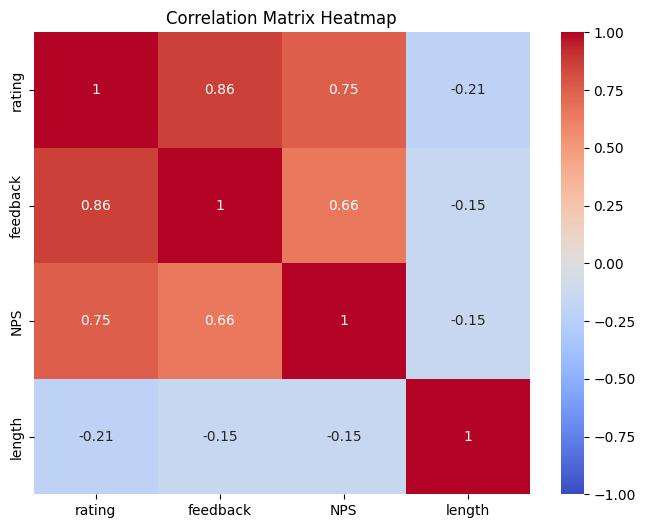

In [ ]:
#Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.show()

#ANALYZING RATING COLUMN

This column refers to the rating of the variation given by the user

In [32]:
df.shape

(2893, 7)

In [33]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{df['rating'].value_counts()}")

Rating value count: 
rating
5    2113
4     415
1     143
3     132
2      90
Name: count, dtype: int64


--> ***Most of the rating are 5star, approximately 2113 reviews***

NNegative reviews, rated 1 and 2 stars, are fewer and appear to slightly outnumber neutral reviews, which have 3 stars

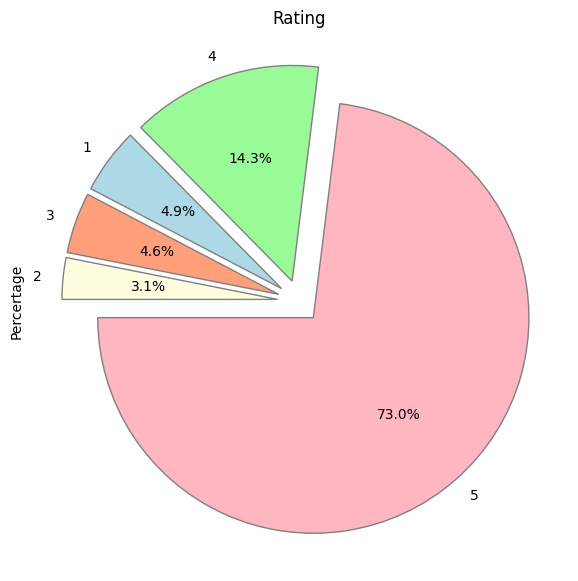

In [76]:
fig = plt.figure(figsize=(7,7))
colors = ('#FFB6C1', '#98FB98', '#ADD8E6', '#FFA07A', '#FFFFE0')
wp = {'linewidth':1, "edgecolor": 'gray'}
tags = df['rating'].value_counts()/df.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=False, colors=colors, startangle=180, wedgeprops=wp, explode=explode, label= 'Percertage')
plt.title('Rating')

from io import BytesIO
graph = BytesIO()
fig. savefig(graph, format="png")

--> ***The percentage distribution relative to all reviews.***

#ANALYZING THE FEEDBACK COLUMN
This column refers to the feedback of the filtered_review

In [75]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2660
0     233
Name: count, dtype: int64


There are 2 distinct values of 'feedback' present: 0 and 1.
Let's see what kind of review each value corresponds to.

In [74]:
#Extracting the 'filtered_reviews' value for one record with feedback = 0

review_0 = df[df['feedback'] == 0].iloc[1]['filtered_reviews']
print(review_0)

âm thanh tệ quá nếu muốn nghe nhạc hay hãy mua một bose


In [73]:
#Extracting the 'filtered_reviews' value for one record with feedback = 1

review_1 = df[df['feedback'] == 1].iloc[1]['filtered_reviews']
print(review_1)

đã yêu nó


--> ***From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review***

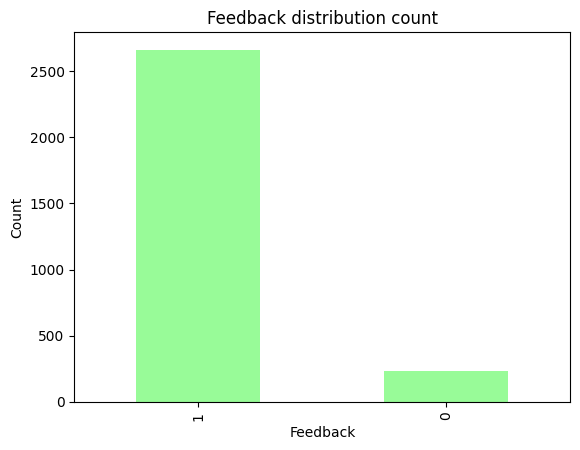

In [72]:
#Bar graph to visualize the total counts of each feedback

df['feedback'].value_counts().plot.bar(color = '#98FB98')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [71]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of r

print(f"Feedback value count - percentage distribution: \n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.95
0     8.05
Name: count, dtype: float64


--> **Feedback distribution**

*   **91.87% reviews are positive**
*  **8.13% reviews are negative**


Text(0.5, 1.0, 'Feedback')

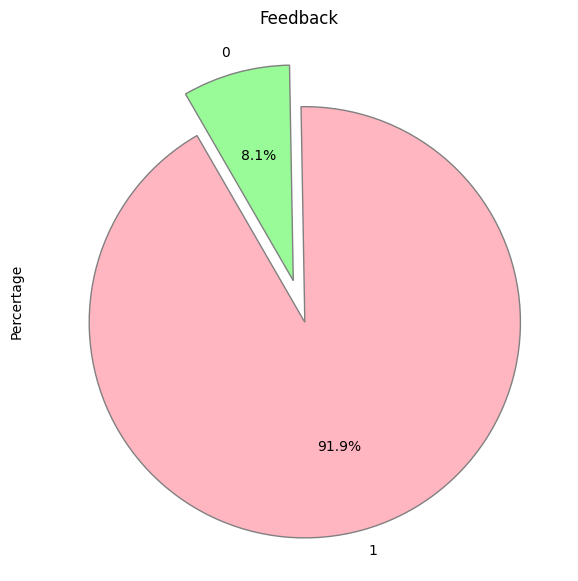

In [70]:
fig = plt.figure(figsize=(7,7))
colors = ('#FFB6C1', '#98FB98')
wp = {'linewidth':1, "edgecolor": 'gray'}
tags = df['feedback'].value_counts()/df.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=False, colors=colors, startangle=120, wedgeprops=wp, explode=explode, label='Percertage')
plt.title('Feedback')

In [69]:
#Count the value of feedback=0 of rating

df[df['feedback'] == 0]['rating'].value_counts()

rating
1    143
2     90
Name: count, dtype: int64

In [68]:
#Count the value of feedback=1 of rating

df[df['feedback'] == 1]['rating'].value_counts()

rating
5    2113
4     415
3     132
Name: count, dtype: int64

--> ***If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).***

#ANALYZING VARIATION
This column refers to the variation or type of the Speaker product. Example - Black Dot, Charcoal Fabric etc...

In [67]:
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{df['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      424
Charcoal Fabric                 378
Configuration: Fire TV Stick    338
Black  Plus                     261
Black                           258
Black  Show                     258
Black  Spot                     234
White  Dot                      165
Heather Gray Fabric             130
White  Spot                     104
White                            88
White  Show                      82
Sandstone Fabric                 76
White  Plus                      76
Oak Finish                       13
Walnut Finish                     8
Name: count, dtype: int64


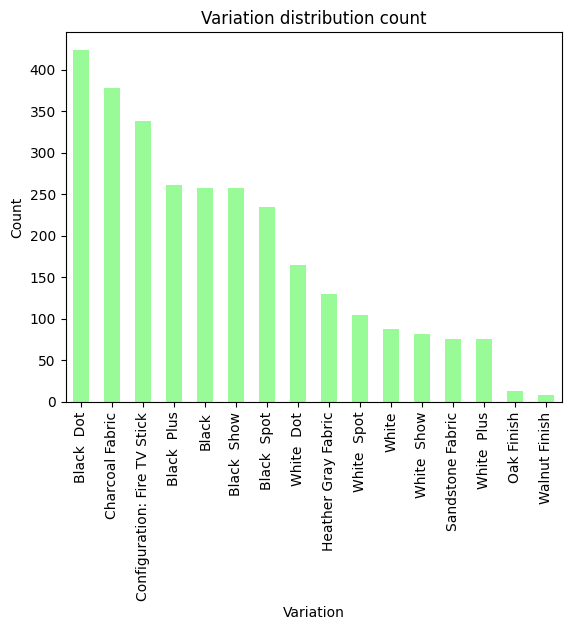

In [66]:
#Bar graph to visualize the total counts of each variation

df['variation'].value_counts().plot.bar(color = '#98FB98')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [65]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(df['variation'].value_counts()/df.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      14.66
Charcoal Fabric                 13.07
Configuration: Fire TV Stick    11.68
Black  Plus                      9.02
Black                            8.92
Black  Show                      8.92
Black  Spot                      8.09
White  Dot                       5.70
Heather Gray Fabric              4.49
White  Spot                      3.59
White                            3.04
White  Show                      2.83
Sandstone Fabric                 2.63
White  Plus                      2.63
Oak Finish                       0.45
Walnut Finish                    0.28
Name: count, dtype: float64


In [64]:
df.groupby('variation')['rating'].mean().sort_values()

variation
White                           4.193182
Black                           4.248062
Sandstone Fabric                4.289474
White  Show                     4.304878
Black  Spot                     4.333333
Black  Plus                     4.379310
White  Plus                     4.394737
White  Spot                     4.403846
Black  Dot                      4.452830
White  Dot                      4.484848
Black  Show                     4.492248
Configuration: Fire TV Stick    4.612426
Heather Gray Fabric             4.700000
Charcoal Fabric                 4.740741
Oak Finish                      4.846154
Walnut Finish                   4.875000
Name: rating, dtype: float64

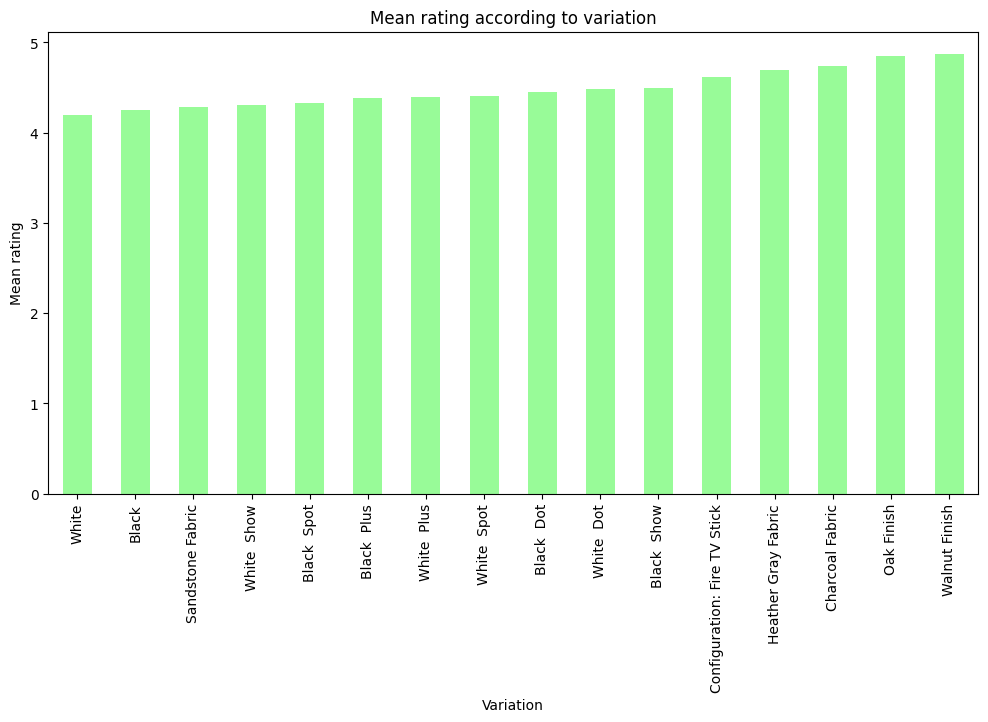

In [63]:
#Analyze the mean rating each variation

df.groupby('variation')['rating'].mean().sort_values().plot.bar(color = '#98FB98', figsize=(12, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

--> ***White variation seem have the lost mean Rating, that could be respect to particular , maybe people dont like white  or not***

***So people who take Walnut Finish variation are more happy***

In [62]:
#feedback = 0

df[df['feedback'] == 0]




,rating,date,variation,feedback,NPS,filtered_reviews,length,NPS_category
46,2,2018-07-30,Charcoal Fabric,0,1,giống như siri trên thực tế siri trả lời chính...,178,Detractor
110,2,2018-07-30,Charcoal Fabric,0,4,âm thanh tệ quá nếu muốn nghe nhạc hay hãy mua...,55,Detractor
140,1,2018-07-30,Charcoal Fabric,0,5,không nhiều tính năng,21,Detractor
161,1,2018-07-30,Sandstone Fabric,0,5,ngừng hoạt động sau 2 tuần không tuân theo mện...,88,Detractor
175,2,2018-07-30,Heather Gray Fabric,0,3,trò đùa buồn vô giá trị,23,Detractor
...,...,...,...,...,...,...,...,...
2973,1,2018-07-30,Black Dot,0,5,echo dot phản hồi khi thậm chí không nói chuyệ...,119,Detractor
2974,1,2018-07-30,White Dot,0,4,không kết nối với danh sách phát điện thoại củ...,51,Detractor
2993,2,2018-07-30,Black Dot,0,5,điểm trừ duy nhất ở sản phẩm này là chất lượng...,203,Detractor
3016,1,2018-07-30,Black Dot,0,4,tôi không đặt hàng,18,Detractor


#Analyzing 'filtered reviews' column
This column contains the textual review given by the user for a variation for the product.

In [60]:
df['length'].describe()

count    2893.000000
mean      129.744210
std       174.304826
min         0.000000
25%        32.000000
50%        75.000000
75%       160.000000
max      2747.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

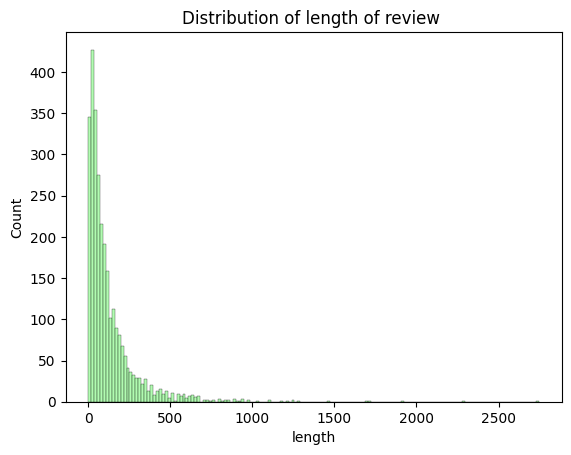

In [61]:
#Length analysis for full dataset

sns.histplot(df['length'],color='#98FB98').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of negative review ')]

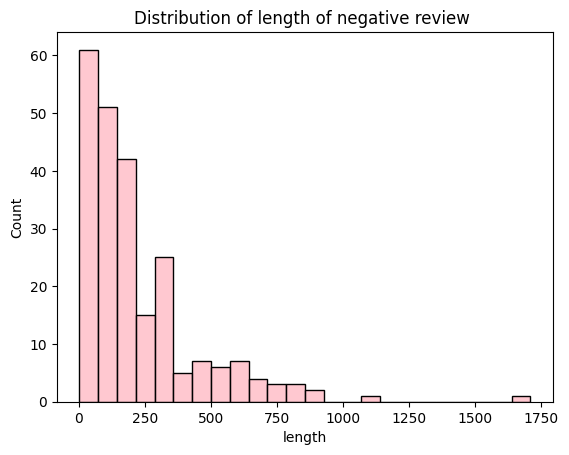

In [59]:
#Length analysis when feedback is 0 (negative)

sns.histplot(df[df['feedback'] == 0]['length'],color='#FFB6C1').set(title='Distribution of length of negative review ')

In [44]:
# Group by rating and calculate mean length of feedback
mean_length_per_rating = df.groupby('rating')['length'].mean()

# Display the result
print(mean_length_per_rating)

rating
1    202.748252
2    247.666667
3    214.962121
4    171.506024
5    106.255088
Name: length, dtype: float64


[Text(0.5, 1.0, 'Distribution of length of positive review ')]

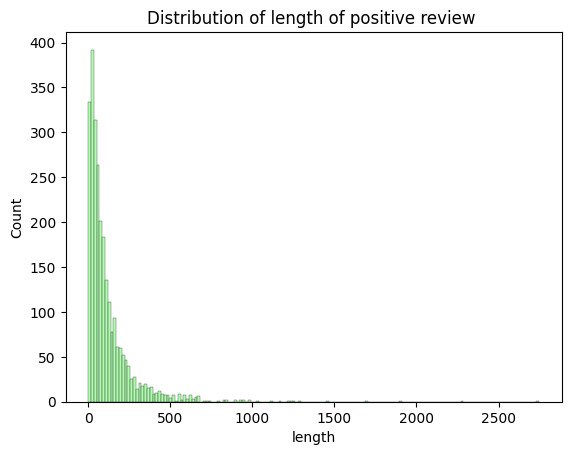

In [58]:
#Length analysis when feedback is 1 (positive)

sns.histplot(df[df['feedback'] == 1]['length'],color='#98FB98').set(title='Distribution of length of positive review ')

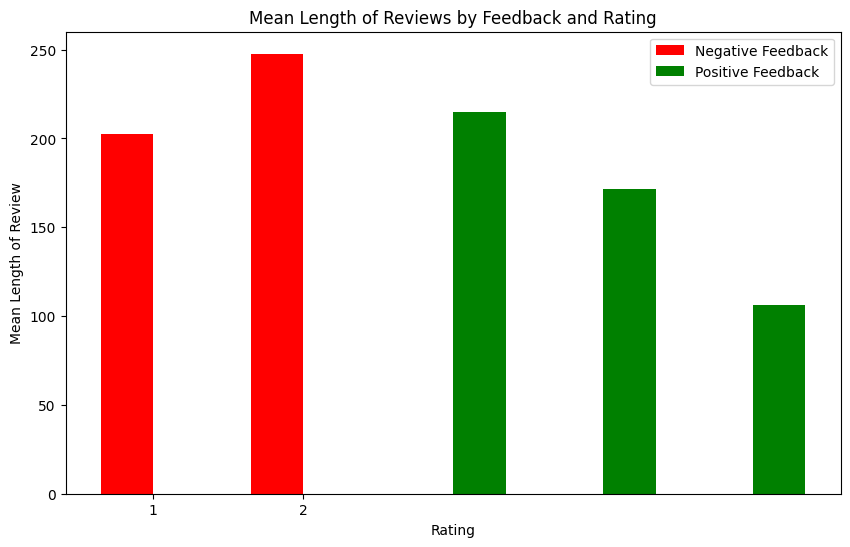

In [36]:
# Group by feedback and rating, calculate mean length
mean_lengths = df.groupby(['feedback', 'rating'])['length'].mean().reset_index()

# Sort ratings from 1 to 5
mean_lengths = mean_lengths.sort_values(by='rating')

# Separate data for negative and positive feedback
negative_feedback = mean_lengths[mean_lengths['feedback'] == 0]
positive_feedback = mean_lengths[mean_lengths['feedback'] == 1]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.35

# Positions of the bars on the x-axis
bar_positions_negative = negative_feedback['rating']
bar_positions_positive = positive_feedback['rating']

# Heights of the bars
bar_heights_negative = negative_feedback['length']
bar_heights_positive = positive_feedback['length']

# Create grouped bar chart
ax.bar(bar_positions_negative - bar_width/2, bar_heights_negative, bar_width, label='Negative Feedback', color='red')
ax.bar(bar_positions_positive + bar_width/2, bar_heights_positive, bar_width, label='Positive Feedback', color='green')

# Add labels, title, and legend
ax.set_xlabel('Rating')
ax.set_ylabel('Mean Length of Review')
ax.set_title('Mean Length of Reviews by Feedback and Rating')
ax.set_xticks(bar_positions_negative)
ax.set_xticklabels(bar_positions_negative)  # Set the tick labels to be the ratings
ax.legend()

# Show plot
plt.show()

--> ***The length of reviews has a negative correlation with both rating (correlation coefficient = -0.21) and feedback = -0.15).  ***   

***We can assume that people tend to write more and longer when they are not happy***



In [38]:
#Let import wordcloud

from wordcloud import WordCloud

In [39]:
from sklearn.feature_extraction.text import CountVectorizer


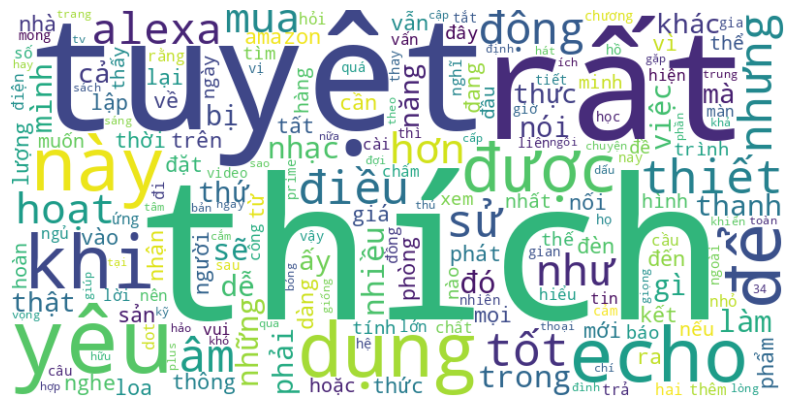

In [57]:
# Combine all reviews into a single string
combined_reviews = ' '.join(df['filtered_reviews'])

# Custom list of stopwords (replace with your stopwords or use an existing library)
custom_stopwords = ['tôi', 'nó', 'và', 'của', 'vời', 'sự', 'không', 'một', 'với', 'đã', 'là']

# Initialize CountVectorizer with custom stopwords
cv = CountVectorizer(stop_words=custom_stopwords)
word_freq = cv.fit_transform([combined_reviews])

# Get feature names (words)
words = cv.get_feature_names_out()

# Generate word frequencies
word_freq = dict(zip(words, word_freq.toarray()[0]))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plotting the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Combine all reviews for each feedback category

neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['filtered_reviews']])
pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['filtered_reviews']])

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

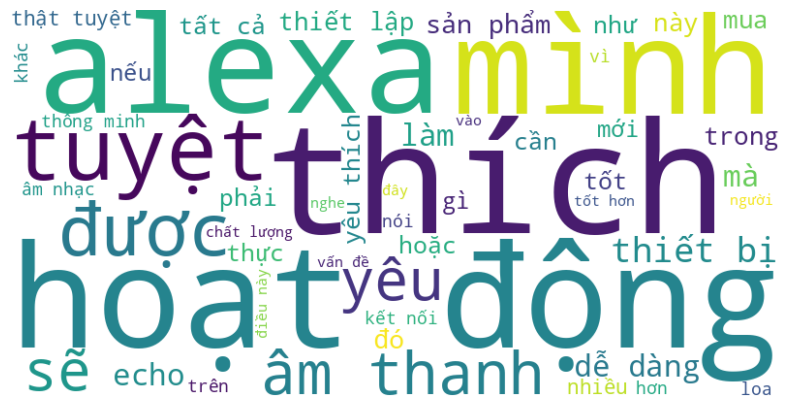

In [56]:
pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['filtered_reviews']])

# Custom list of stopwords (replace with your stopwords or use an existing library)
custom_stopwords = ['tôi', 'nó', 'và', 'của', 'vời', 'sự', 'không', 'một', 'với', 'đã', 'là', 'rất', 'khi', 'dụng', 'những', 'để', 'ấy', 'nhưng', 'sử']

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords, max_words=50).generate(pos_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

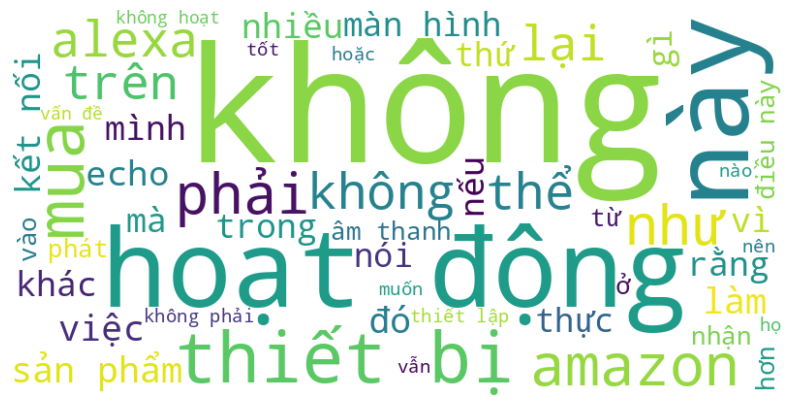

In [55]:
neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['filtered_reviews']])

# Custom list of stopwords (replace with your stopwords or use an existing library)
custom_stopwords = ['sẽ', 'được', 'tôi', 'nó', 'và', 'của', 'vời', 'sự', 'một', 'với', 'đã', 'là', 'rất', 'khi', 'dụng', 'những', 'để', 'ấy', 'nhưng', 'sử']

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords, max_words=50).generate(neg_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#ANALYZING THE NET PROMOTER SCORE (NPS)

In [46]:
# Categorize NPS based on NPS column
def categorize_nps(rating):
    if rating >= 9:
        return 'Promoter'
    elif rating >= 7:
        return 'Passive'
    else:
        return 'Detractor'

df['NPS_category'] = df['NPS'].apply(categorize_nps)

In [51]:
df.sample(8)

,rating,date,variation,feedback,NPS,filtered_reviews,length,NPS_category
2333,5,2018-07-30,Configuration: Fire TV Stick,1,8,mới với fire tv stick xa tốt,28,Passive
2457,5,2018-07-30,Black Dot,1,8,thực sự thích nó,16,Passive
1306,5,2018-07-21,Black Spot,1,10,thời gian phản hồi của màn hình tốt hơn tôi mo...,215,Promoter
721,3,2018-07-30,Heather Gray Fabric,1,4,loa âm thanh khá tốt vì quá nhỏ và việc thiết ...,241,Detractor
1522,5,2018-07-30,Black Show,1,10,ước gì tôi mua một để đi làm,28,Promoter
894,4,2018-07-29,Heather Gray Fabric,1,7,phạm vi nghe tốt và chất lượng âm thanh việc t...,231,Passive
2336,5,2018-07-30,Configuration: Fire TV Stick,1,10,đây là firestick thứ hai của tôi tôi rất hài l...,67,Promoter
1095,5,2018-07-30,Black Spot,1,10,thiết bị này là hoàn hảo một đồng hồ đầu giườn...,618,Promoter


In [50]:
df['NPS_category'].value_counts()

NPS_category
Passive      1273
Promoter     1255
Detractor     365
Name: count, dtype: int64

In [47]:
# Calculate NPS percentages
nps_counts = df['NPS_category'].value_counts(normalize=True) * 100

# Calculate NPS score
nps = nps_counts.get('Promoter', 0) - nps_counts.get('Detractor', 0)

# Print results
print(f"NPS Score: {nps:.2f}")
print("NPS Breakdown:")
print(nps_counts)

NPS Score: 30.76
NPS Breakdown:
NPS_category
Passive      44.002765
Promoter     43.380574
Detractor    12.616661
Name: proportion, dtype: float64


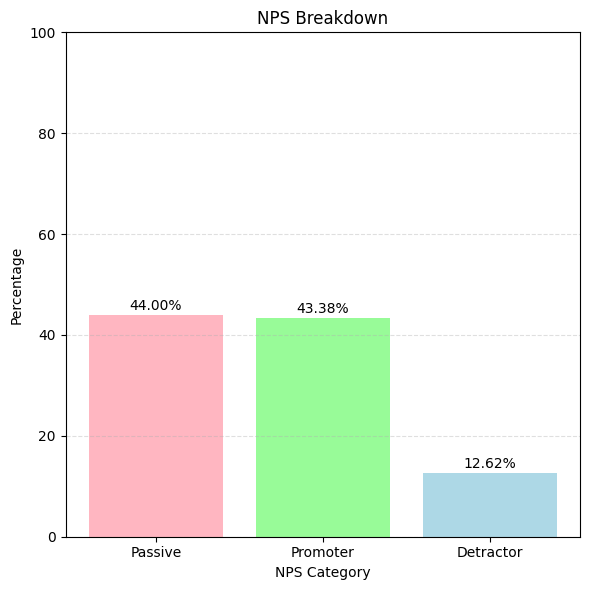

In [48]:
# Define the data
categories = ['Passive', 'Promoter', 'Detractor']
percentages = [44.002765, 43.380574, 12.616661]

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(categories, percentages, color=['#FFB6C1', '#98FB98', '#ADD8E6'])
plt.title('NPS Breakdown')
plt.xlabel('NPS Category')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Display the percentages on top of each bar
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


--> The NPS score of 30.76 indicates that there is a positive overall sentiment among customers surveyed.

We should focusing on converting Passives into Promoters and addressing issues causing Detractors could further improve the NPS score and overall customer satisfaction.

#ANALYZING SATISFACTION - CSAT AND CDSAT SCORE

---



In [53]:
# Calculate CSAT
positive_ratings = df[df['rating'].isin([3, 4, 5])]
CSAT = (len(positive_ratings) / len(df['rating'])) * 100

# Calculate CDSAT
negative_ratings = df[df['rating'].isin([1, 2])]
CDSAT = (len(negative_ratings) / len(df['rating'])) * 100


print(f"CSAT Score: {CSAT:.2f}%")
print(f"CDSAT Score: {CDSAT:.2f}%")

CSAT Score: 91.95%
CDSAT Score: 8.05%


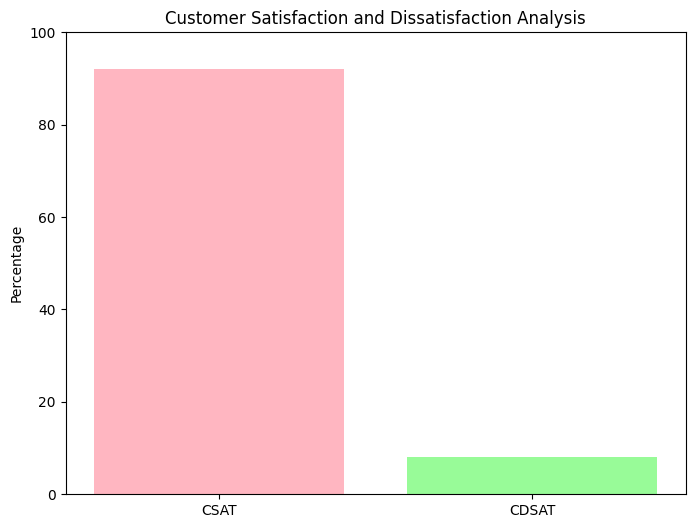

In [54]:
# Plotting the scores
scores = {'CSAT': CSAT, 'CDSAT': CDSAT}
plt.figure(figsize=(8, 6))
plt.bar(scores.keys(), scores.values(), color=['#FFB6C1', '#98FB98'])
plt.title('Customer Satisfaction and Dissatisfaction Analysis')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

--> ***A CSAT score of 91.95% indicates most of customers are satisfied with the product. This high percentage is typically indicative of excellent performance and strong customer approval.***